**<font  size=6>深度優先搜索算法(DFS)</font>**

**<font  size=5>1.前言</font>**  
深度優先搜索（縮寫DFS）有點類似廣度優先搜索，也是對一個連通圖進行遍歷的算法。它的思想是從一個頂點V0開始，沿著一條路一直走到底，如果發現不能到達目標解，那就返回到上一個節點，然後從另一條路開始走到底，這種盡量往深處走的概念即是深度優先的概念。

**<font  size=5>2.深度優先搜索VS廣度優先搜索</font>**  
**2.1演示深度優先搜索的過程**  
還是引用上篇文章的樣例圖，起點仍然是V0，我們修改一下題目意思，只需要讓你找出一條V0到V6的道路，而無需最短路。

In [2]:
%matplotlib inline
from IPython.display import Image

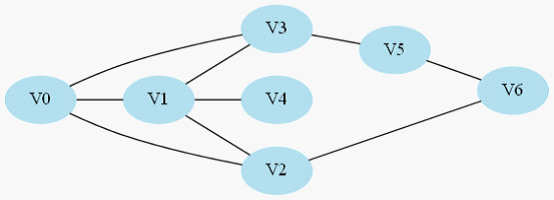

In [8]:
Image('./圖/深度優先/1.png')

假設按照以下的順序來搜索：

1.V0->V1->V4 ，此時到底盡頭，仍然到不了V6 ，於是原路返回到V1去搜索其他路徑；

2.返回到V1後既搜索V2 ，於是搜索路徑是V0->V1->V2->V6, ，找到目標節點，返回有解。

這樣搜索只是2步就到達了，但是如果用BFS的話就需要多幾步。

**2.2深度與廣度的比較**  
我們假設一個節點衍生出來的相鄰節點平均的個數是 $N$ 個，那麼當起點開始搜索的時候，隊列有一個節點，當起點拿出來後，把它相鄰的節點放進去，那麼隊列就有N個節點，當下一層的搜索中再加入元素到隊列的時候，節點數達到了 $N^{2}$ ，你可以想想，一旦 $N$ 是一個比較大的數的時候，這個樹的層次又比較深，那這個隊列就得需要很大的內存空間了。

於是廣度優先搜索的缺點出來了：在樹的層次較深&子節點數較多的情況下，消耗內存十分嚴重。廣度優先搜索適用於節點的子節點數量不多，並且樹的層次不會太深的情況。

那麼深度優先就可以克服這個缺點，因為每次搜的過程，每一層只需維護一個節點。但回過頭想想，廣度優先能夠找到最短路徑，那深度優先能否找到呢？深度優先的方法是一條路走到黑，那顯然無法知道這條路是不是最短的，所以你還得繼續走別的路去判斷是否是最短路？

於是深度優先搜索的缺點也出來了：難以尋找最優解，僅僅只能尋找有解。其優點就是內存消耗小，克服了剛剛說的廣度優先搜索的缺點。

**<font  size=5>3.深度優先搜索</font>**  
**3.1.舉例**  

求圖中的V0出發，是否存在一條路徑長度為4的搜索路徑。

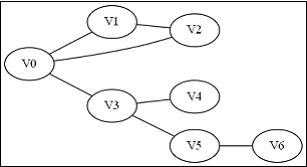

In [10]:
Image('./圖/深度優先/2.png')

顯然，我們知道是有這樣一個解的：V0->V3->V5->V6。

**3.2.處理過程**

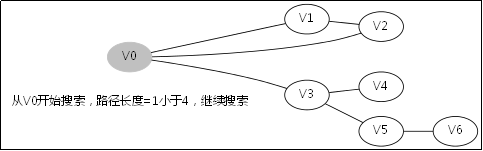

In [11]:
Image('./圖/深度優先/3.png')

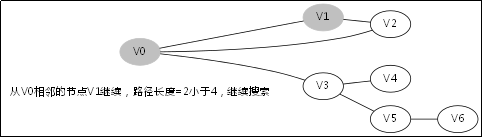

In [12]:
Image('./圖/深度優先/4.png')

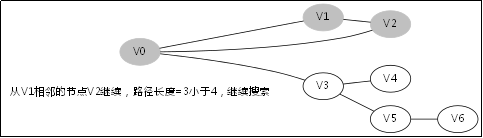

In [13]:
Image('./圖/深度優先/5.png')

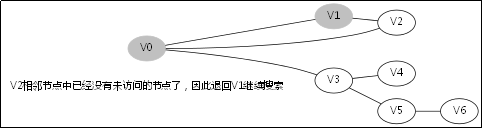

In [14]:
Image('./圖/深度優先/6.png')

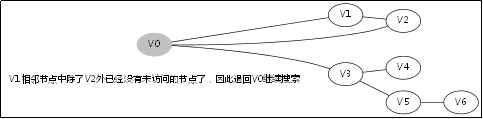

In [15]:
Image('./圖/深度優先/7.png')

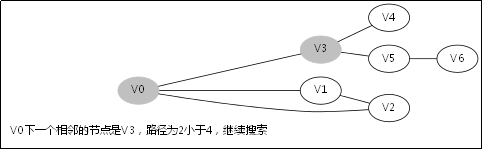

In [16]:
Image('./圖/深度優先/8.png')

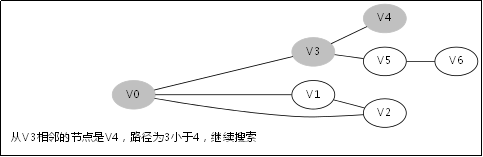

In [17]:
Image('./圖/深度優先/9.png')

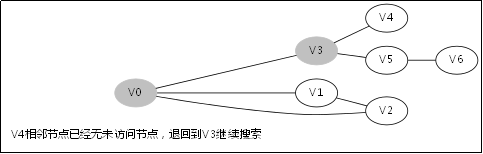

In [18]:
Image('./圖/深度優先/10.png')

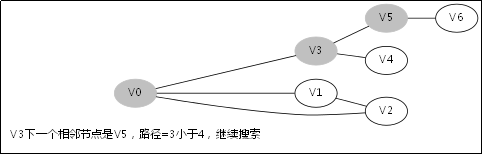

In [21]:
Image('./圖/深度優先/11.png')

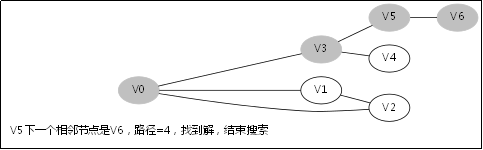

In [22]:
Image('./圖/深度優先/12.png')

**3.3.DFS函數的調用堆棧**

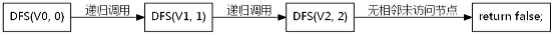

In [24]:
Image('./圖/深度優先/13.png')

此後堆棧調用返回到V0那一層，因為V1那一層也找不到跟V1的相鄰未訪問節點

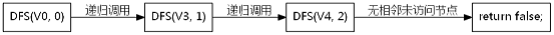

In [25]:
Image('./圖/深度優先/14.png')

此後堆棧調用返回到V3那一層

In [26]:
Image('./圖/深度優先/15.png')

此後堆棧調用返回到主函數調用DFS(V0,0)的地方，因為已經找到解，無需再從別的節點去搜別的路徑了。

**<font  size=5>4.核心代碼</font>**  


In [1]:
graph = {
        "V0":["V1", "V2", "V3"],
        "V1":["V0","V2"],
        "V2":["V0","V1"],
        "V3":["V0","V4","V5"],
        "V4":["V3"],
        "V5":["V3","V6"],
        "V6":["V5"]}

In [34]:
# Depth-First Search
def DFS(now, d,visit):
    print(now)
    visit.add(now)
    for nxt in graph[now]:
        if nxt in visit:
            continue
        DFS(nxt,d+1,visit)
    


In [35]:
#順序
DFS('V0',1,set())

V0
V1
V2
V3
V4
V5
V6
